In [ ]:
# 머신러닝의 기본자료구조
# ndarray, dataframe, panel(3차원 데이터를 다루기 위한 자료구조)
# scikit-learn도 dataframe을 기본구조로 하고

In [7]:
# panel은 dataframe으로 구성됨
# 면(층의 개념), 행, 열로 구성
# items, Mafor_axis(행), Minor_axis(열)
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)),
        'Item2' : pd.DataFrame(np.random.randn(4, 2)),
        'Item3' : pd.DataFrame(np.random.randn(4, 2))} # Item이 면
p = pd.Panel(data)
# 면
print(p['Item1'])
print(p['Item2'])

          0         1         2
0  0.407703  0.176882  0.299744
1  0.268210  0.064365  0.771445
2  1.355590  0.526566 -0.299774
3 -0.210431  0.998005  2.045942
          0         1   2
0  0.219650 -1.518737 NaN
1  0.766073  1.512644 NaN
2  0.862106  0.771322 NaN
3  1.504094  1.118687 NaN


C:\Users\acorn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
print(p.major_xs(0)) # 각 면의 첫번째 행 출력

      Item1     Item2     Item3
0  0.407703  0.219650 -0.575225
1  0.176882 -1.518737  0.836304
2  0.299744       NaN       NaN


In [366]:
print(p.minor_xs(1))
print('\n', p.iloc[:,:,1])

      Item1     Item2     Item3
0  0.176882 -1.518737  0.836304
1  0.064365  1.512644 -0.766662
2  0.526566  0.771322 -0.294596
3  0.998005  1.118687 -0.138877

       Item1     Item2     Item3
0  0.176882 -1.518737  0.836304
1  0.064365  1.512644 -0.766662
2  0.526566  0.771322 -0.294596
3  0.998005  1.118687 -0.138877


In [11]:
p.minor_xs(2)

,Item1,Item2,Item3
0,0.299744,NaN,NaN
1,0.771445,NaN,NaN
2,-0.299774,NaN,NaN
3,2.045942,NaN,NaN


In [13]:
p.iloc[1,1,1]

1.512644439502395

In [19]:
# 명시적으로 계층적 인덱스 사용하기 - 관심있는 데이터를 묶기 위해 사용

# 인덱스에는 인덱스와 인덱스 이름 필요
frame = pd.DataFrame(np.arange(12).reshape((4,3)), # index는 행, columns는 열
                    index = [['a', 'a', 'b', 'b'], [1,2,1,2]], # index에 리스트 2개가 입력됨 -> 계층적 인덱스 부여
                    columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])
print(frame)
# 이와 달리 pivot, pivot_table은 자동으로 계층적 인덱스를 생성해줌

frame.index.names=['key1', 'key2'] # a,b를 key1으로 1,2를 key2로 네이밍
frame.columns.names=['state', 'color']
print()
print(frame)

     Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11


In [21]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [27]:
frame.swaplevel('key1', 'key2') # key1과 key2의 순서를 바꿔줌 - (0, 1)로 넣어줘도 같음(level이 행의 계층을 의미하는듯)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [23]:
frame.sort_index(1) # 1 : 열을 sorting 함, 0은 행 sort

state     Colorado  Ohio    
color        Green Green Red
key1 key2                   
a    1           2     0   1
     2           5     3   4
b    1           8     6   7
     2          11     9  10

In [26]:
frame.swaplevel(0,1).sort_index(1)

state     Colorado  Ohio    
color        Green Green Red
key2 key1                   
1    a           2     0   1
2    a           5     3   4
1    b           8     6   7
2    b          11     9  10

In [28]:
# 기존의 데이터를 이용해서 계층적 인덱스를 부여하는 방법
# 범주형 데이터에 적용 가능
frame = pd.DataFrame({'a':range(7), 'b':range(7,0,-1),
                     'c':['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                     'd':[0,1,2,0,1,2,3]})

print(frame)
frame2 = frame.set_index(['c', 'd']) # c와 d가 행의 상위 계층으로 추가됨
frame2

   a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3


a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [29]:
frame2.reset_index() # 추가된 인덱스 제거

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [32]:
# 원하는 행과 열을 뽑아서 새로운 데이터를 생성하고자 할 때 reindex 사용
frame_reindex = frame.reindex(index=[0,2,5], columns=['a','d'])
frame_reindex

,a,d
0,0,0
2,2,2
5,5,2


In [33]:
frame_reindex.describe()

,a,d
count,3.000000,3.000000
mean,2.333333,1.333333
std,2.516611,1.154701
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.500000,2.000000
max,5.000000,2.000000


In [78]:
import pymysql
import numpy as np
import pandas as pd

conn = pymysql.connect(host='192.168.0.148', port=3306, user='root',
                      passwd='1234', db='acorn', charset='UTF8mb4',
                      cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
cursor.execute('select * from sungjuk')
rez = cursor.fetchall()
print(rez)
df = pd.DataFrame(rez)
print(df.dtypes)
df.head()

[{'class': 2, 'name': '나', 'kor': 80, 'mat': 80, 'eng': 80, 'total': 240, 'average': None, 'grade': None}, {'class': 2, 'name': '다', 'kor': 80, 'mat': 80, 'eng': 90, 'total': 250, 'average': None, 'grade': None}]
average    object
class       int64
eng         int64
grade      object
kor         int64
mat         int64
name       object
total       int64
dtype: object


,average,class,eng,grade,kor,mat,name,total
0,None,2,80,None,80,80,나,240
1,None,2,90,None,80,80,다,250


In [38]:
df.describe()

,class,eng,kor,mat,total
count,2.0,2.000000,2.0,2.0,2.000000
mean,2.0,85.000000,80.0,80.0,245.000000
std,0.0,7.071068,0.0,0.0,7.071068
min,2.0,80.000000,80.0,80.0,240.000000
25%,2.0,82.500000,80.0,80.0,242.500000
50%,2.0,85.000000,80.0,80.0,245.000000
75%,2.0,87.500000,80.0,80.0,247.500000
max,2.0,90.000000,80.0,80.0,250.000000


KeyboardInterrupt: 

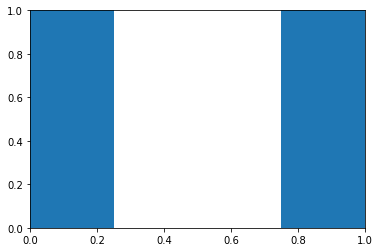

In [367]:
import matplotlib
df.plot.bar(stacked=True)

In [51]:
# 문제 : 국어, 영어, 수학점수만 골라내서 과목별 합계와 최대값을 출력하시오
df_subject = df[['kor', 'eng', 'mat']]
print('과목별 합계\n', df_subject.apply(sum), end='\n\n')
print('과목별 최고점수\n', df_subject.apply(max))
df_subject.apply([sum, max])

과목별 합계
 kor    160
eng    170
mat    160
dtype: int64

과목별 최고점수
 kor    80
eng    90
mat    80
dtype: int64


,kor,eng,mat
sum,160,170,160
max,80,90,80


In [79]:
# 문제 : 랜덤함수를 이용하여 0:남성, 1:여성인 성별필드(sex)를 생성하고, 성별 필드를 중심으로 pivot_table을 생성하고 그 합계를 출력하시오
df['sex'] = np.random.choice(['남성', '여성'], 2)
df.pivot_table(index=['sex'], values=['kor', 'eng', 'mat'], aggfunc=max)

,eng,kor,mat
sex,,,
남성,80,80,80
여성,90,80,80


In [83]:
# 크롤링한 데이터를 dataframe으로 생성
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import json
json_data1 = '''{
"color" : "red",
"value" : "#f00"
}'''
result = json.loads(json_data1)
print(result)
print(result['color'])
print(result['value'])

{'color': 'red', 'value': '#f00'}
red
#f00


In [85]:
from bs4 import BeautifulSoup
import urllib3
http = urllib3.PoolManager()

movieListUrl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json?key=430156241533f1d058c603178cc3ca0e&openStartDt=2016&itemPerPage=20"

In [103]:
response = http.request('GET', movieListUrl)
movieIdData = BeautifulSoup(response.data, 'html.parser')

print(type(movieIdData))
print(movieIdData.prettify())

<class 'bs4.BeautifulSoup'>
{"movieListResult":{"totCnt":4365,"source":"영화진흥위원회","movieList":[{"movieCd":"20184143","movieNm":"스텝 업: 비트 더 월드","movieNmEn":"Beat the World","prdtYear":"2011","openDt":"20180724","typeNm":"장편","prdtStatNm":"개봉","nationAlt":"캐나다","genreAlt":"드라마","repNationNm":"캐나다","repGenreNm":"드라마","directors":[{"peopleNm":"로버트 애드튜이"}],"companys":[]},{"movieCd":"20184142","movieNm":"신들의 제국","movieNmEn":"Katherine of Alexandria","prdtYear":"2014","openDt":"20180724","typeNm":"장편","prdtStatNm":"개봉","nationAlt":"영국","genreAlt":"드라마","repNationNm":"영국","repGenreNm":"드라마","directors":[{"peopleNm":"마이클 레드우드"}],"companys":[]},{"movieCd":"20183928","movieNm":"용의자: 폭탄 테러를 막아라","movieNmEn":"Freaky Deaky","prdtYear":"2012","openDt":"20180712","typeNm":"장편","prdtStatNm":"개봉","nationAlt":"미국","genreAlt":"코미디,범죄,스릴러","repNationNm":"미국","repGenreNm":"코미디","directors":[{"peopleNm":"찰스 매튜"}],"companys":[]},{"movieCd":"20184802","movieNm":"몬스터 호텔 3","movieNmEn":"Hotel Transylvania 3: A Mo

In [104]:
movieIdData = json.loads(str(movieIdData))
print(movieIdData["movieListResult"])
print(len(movieIdData["movieListResult"]["movieList"]))

{'totCnt': 4365, 'source': '영화진흥위원회', 'movieList': [{'movieCd': '20184143', 'movieNm': '스텝 업: 비트 더 월드', 'movieNmEn': 'Beat the World', 'prdtYear': '2011', 'openDt': '20180724', 'typeNm': '장편', 'prdtStatNm': '개봉', 'nationAlt': '캐나다', 'genreAlt': '드라마', 'repNationNm': '캐나다', 'repGenreNm': '드라마', 'directors': [{'peopleNm': '로버트 애드튜이'}], 'companys': []}, {'movieCd': '20184142', 'movieNm': '신들의 제국', 'movieNmEn': 'Katherine of Alexandria', 'prdtYear': '2014', 'openDt': '20180724', 'typeNm': '장편', 'prdtStatNm': '개봉', 'nationAlt': '영국', 'genreAlt': '드라마', 'repNationNm': '영국', 'repGenreNm': '드라마', 'directors': [{'peopleNm': '마이클 레드우드'}], 'companys': []}, {'movieCd': '20183928', 'movieNm': '용의자: 폭탄 테러를 막아라', 'movieNmEn': 'Freaky Deaky', 'prdtYear': '2012', 'openDt': '20180712', 'typeNm': '장편', 'prdtStatNm': '개봉', 'nationAlt': '미국', 'genreAlt': '코미디,범죄,스릴러', 'repNationNm': '미국', 'repGenreNm': '코미디', 'directors': [{'peopleNm': '찰스 매튜'}], 'companys': []}, {'movieCd': '20184802', 'movieNm': '몬스터 호텔 

In [129]:
movieIDDF = pd.DataFrame()
movieIDDF = movieIDDF.append({"movieCd":"", "movieNm":"", "movieNmEn":"",
                              "openDt":"", "directorpeopleNm":""}, ignore_index=True)
for i in range(0, 20):
    movieIDDF.loc[i, "movieCd"] = movieIdData["movieListResult"]["movieList"][i]["movieCd"]
    movieIDDF.loc[i, "movieNm"] = movieIdData["movieListResult"]["movieList"][i]["movieNm"]
    movieIDDF.loc[i, "movieNmEn"] = movieIdData["movieListResult"]["movieList"][i]["movieNmEn"]
    movieIDDF.loc[i, "openDt"] = movieIdData["movieListResult"]["movieList"][i]["openDt"]
    movieIDDF.loc[i, "directorpeopleNm"] = movieIdData["movieListResult"]["movieList"][i]["directors"][0]["peopleNm"]
    
movieIDDF
movieIDDF["year"] = movieIDDF["openDt"].apply(lambda x:str(x)[:4])
movieIDDF["month"] = movieIDDF["openDt"].apply(lambda x:str(x)[4:6])
movieIDDF["day"] = movieIDDF["openDt"].apply(lambda x:str(x)[6:])
print(movieIDDF)

   directorpeopleNm   movieCd                movieNm  \
0          로버트 애드튜이  20184143          스텝 업: 비트 더 월드   
1          마이클 레드우드  20184142                 신들의 제국   
2             찰스 매튜  20183928        용의자: 폭탄 테러를 막아라   
3         젠디 타타코브스키  20184802               몬스터 호텔 3   
4                변혁  20177537                   상류사회   
5               조규장  20170670                    목격자   
6            토미죠 타로  20188464       하고 싶은 날:보여주는 유부녀   
7              히로아키  20188445        은밀한 여관:먹고,자고,하고   
8          키무라 히로유키  20188465    시아버지와 며느리:참을 수 없는 날   
9               에츠로  20188463           낯선 남자:젖어버렸어요   
10               이민  20187924            폰 섹스의 덫-감독판   
11              이상민  20178972     친구엄마 : 섹스 하던 날 무삭제   
12              이상민  20181524  친구엄마 : 내 여자가 되던 날 무삭제   
13              이상민  20177887     정사 : 시아버지와 도련님 무삭제   
14             돈 호에  20188022          그루지: 죽은 자의 저주   
15              김지운  20170942                     인랑   
16            필립 귀엔  20187682                해적왕

In [122]:
# 문제 : 연도별, 월별, 일자별, 개봉작 개수를 카운트 하시오
movie_groupby = movieIDDF.groupby(["year", "month", "day"])
print(movie_groupby.head())
print(movie_groupby["movieCd"].apply(lambda x: len(x)))

   dirctorpeopleNm   movieCd                movieNm  \
0         로버트 애드튜이  20184143          스텝 업: 비트 더 월드   
1         마이클 레드우드  20184142                 신들의 제국   
2            찰스 매튜  20183928        용의자: 폭탄 테러를 막아라   
3        젠디 타타코브스키  20184802               몬스터 호텔 3   
4               변혁  20177537                   상류사회   
5              조규장  20170670                    목격자   
6           토미죠 타로  20188464       하고 싶은 날:보여주는 유부녀   
7             히로아키  20188445        은밀한 여관:먹고,자고,하고   
8         키무라 히로유키  20188465    시아버지와 며느리:참을 수 없는 날   
9              에츠로  20188463           낯선 남자:젖어버렸어요   
10              이민  20187924            폰 섹스의 덫-감독판   
11             이상민  20178972     친구엄마 : 섹스 하던 날 무삭제   
12             이상민  20181524  친구엄마 : 내 여자가 되던 날 무삭제   
14            돈 호에  20188022          그루지: 죽은 자의 저주   
15             김지운  20170942                     인랑   

                                     movieNmEn    openDt  year month day  
0                               Beat the Wor

In [134]:
# 답안
pd.pivot_table(movieIDDF, index=["year", "month", "day"],
              values=["directorpeopleNm"], aggfunc=[len], fill_value=0, margins=True)


len
               directorpeopleNm
year month day                 
2018 07    12                 1
           24                 7
           25                 8
     08    08                 1
           09                 1
           15                 1
           29                 1
All                          20

In [132]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'A' : ['일반', '일반', '특수', '예외'] * 6,
                   'B' : ['서울', '대구', '부산'] * 8,
                   'C' : ['건조', '건조', '건조', '우기', '우기', '우기'] * 4,
                   'D' : np.random.randn(24),
                   'E' : np.random.randn(24)})
print(df)
pd.crosstab(df.A, df.B) # 행과 열을 대입해서 구조를 생성

     A   B   C         D         E
0   일반  서울  건조  1.198547  0.069209
1   일반  대구  건조  1.557853  0.525172
2   특수  부산  건조  0.278111  0.058926
3   예외  서울  우기  0.552333  0.192891
4   일반  대구  우기  0.414272 -0.310691
5   일반  부산  우기 -0.816029  1.191688
6   특수  서울  건조  0.643356  0.043873
7   예외  대구  건조 -1.430096 -0.070553
8   일반  부산  건조  0.604898 -2.482034
9   일반  서울  우기 -0.340852  2.072456
10  특수  대구  우기  1.212570  0.369743
11  예외  부산  우기  0.702894 -2.040875
12  일반  서울  건조  0.593545  0.671804
13  일반  대구  건조 -1.049669 -1.593608
14  특수  부산  건조 -0.267935 -0.329222
15  예외  서울  우기 -0.163185  0.573108
16  일반  대구  우기 -1.256405 -0.807531
17  일반  부산  우기 -0.839182 -1.740658
18  특수  서울  건조 -0.012209  0.454455
19  예외  대구  건조  0.250374 -2.029055
20  일반  부산  건조  0.644772 -0.102876
21  일반  서울  우기  0.796815  0.330438
22  특수  대구  우기 -0.720529  0.390970
23  예외  부산  우기  0.581857 -1.260208


B,대구,부산,서울
A,,,
예외,2,2,2
일반,4,4,4
특수,2,2,2


In [133]:
pd.crosstab(df.A, df.C, margins=True)

C,건조,우기,All
A,,,
예외,2,4,6
일반,6,6,12
특수,4,2,6
All,12,12,24


In [135]:
pd.crosstab([df.A, df.B], df.C, margins=True)

C       건조  우기  All
A   B              
예외  대구   2   0    2
    부산   0   2    2
    서울   0   2    2
일반  대구   2   2    4
    부산   2   2    4
    서울   2   2    4
특수  대구   0   2    2
    부산   2   0    2
    서울   2   0    2
All     12  12   24

In [138]:
pd.crosstab(df.A, df.B).apply(lambda r : r/r.sum(), axis=1) # axis=1 -> 행별 합으로 나눠줌

B,대구,부산,서울
A,,,
예외,0.333333,0.333333,0.333333
일반,0.333333,0.333333,0.333333
특수,0.333333,0.333333,0.333333


In [145]:
# 문제 : diamond.csv를 로딩하고 clarity와 carat 간의 crosstab을 생성하시오
# barplot 하시오
# price와 clarity 간의 boxplot을 출력하시오
# cut과 clarity 데이터로 군집화하고 그 size를 확인하시오
# clarity와 color 간의 crosstab을 생성하고 barplot 하시오
diamond = pd.read_csv('diamond.csv')
print(type(diamond))
diamond.head()

<class 'pandas.core.frame.DataFrame'>


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [148]:
pd.crosstab(diamond.clarity, diamond.cut)

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,106,60,125,138,61
IF,2,36,324,90,135
SI1,273,1011,2731,2471,2128
SI2,353,823,1851,2302,1591
VS1,97,402,2005,1258,1144
VS2,158,654,2777,2194,1667
VVS1,11,93,800,244,383
VVS2,37,155,1266,455,694


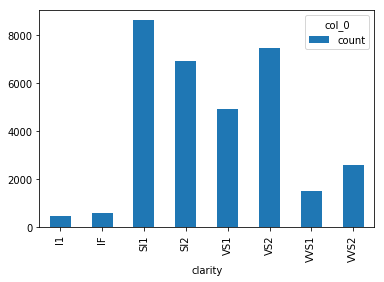

In [176]:
import matplotlib
pd.crosstab(diamond.clarity, columns='count').plot.bar()

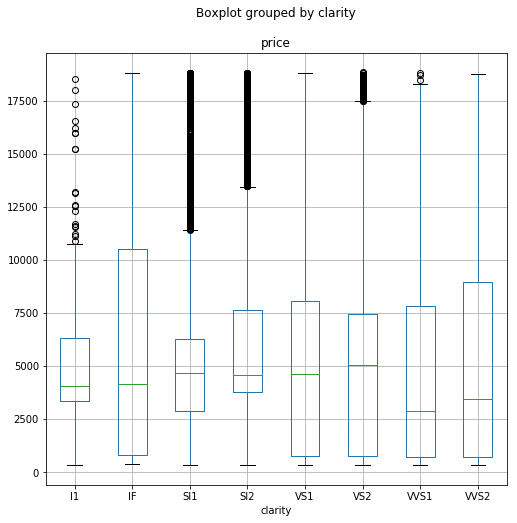

In [178]:
diamond.boxplot(column='price', by='clarity', figsize=(8,8))

In [188]:
diamond_group = diamond.groupby(['cut', 'clarity'])
print(diamond_group.size())
diamond_group.head()

cut        clarity
Fair       I1          106
           IF            2
           SI1         273
           SI2         353
           VS1          97
           VS2         158
           VVS1         11
           VVS2         37
Good       I1           60
           IF           36
           SI1        1011
           SI2         823
           VS1         402
           VS2         654
           VVS1         93
           VVS2        155
Ideal      I1          125
           IF          324
           SI1        2731
           SI2        1851
           VS1        2005
           VS2        2777
           VVS1        800
           VVS2       1266
Premium    I1          138
           IF           90
           SI1        2471
           SI2        2302
           VS1        1258
           VS2        2194
           VVS1        244
           VVS2        455
Very Good  I1           61
           IF          135
           SI1        2128
           SI2        1591
         

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,30,74,88,84,125,57,32
IF,53,51,103,162,120,77,21
SI1,1333,1466,1277,1218,1702,1086,532
SI2,962,1155,1141,1158,1300,790,414
VS1,345,611,776,1349,776,652,397
VS2,743,1191,1362,1603,1148,874,529
VVS1,99,227,296,432,298,141,38
VVS2,250,440,489,760,384,184,100


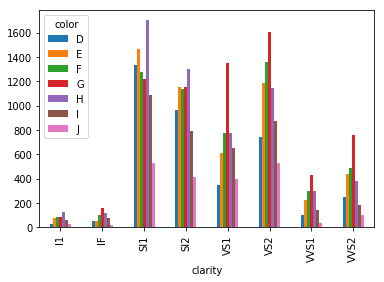

In [173]:
pd.crosstab(diamond.clarity, diamond.color).plot.bar()
pd.crosstab(diamond.clarity, diamond.color)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
col_0    count
clarity       
I1         490
IF         587
SI1       8614
SI2       6920
VS1       4906


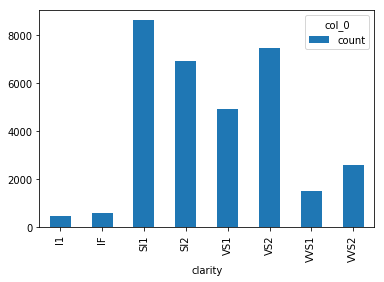

In [184]:
# 답안
%matplotlib inline
df = pd.read_csv('diamond.csv')
print(df.dtypes)
print(df.head())

# oneway table : 데이터가 values이지 않으면 frequency로 작동 도수를 표현
# 'count'는 필드명
my_tab = pd.crosstab(index=df['clarity'], columns='count') 
# crosstab은 행과 열을 반드시 지정해야 하므로 clarity의 개수만 보려면 'count'를 columns에 입력해줘야 함
print(my_tab.head())
my_tab.plot.bar()

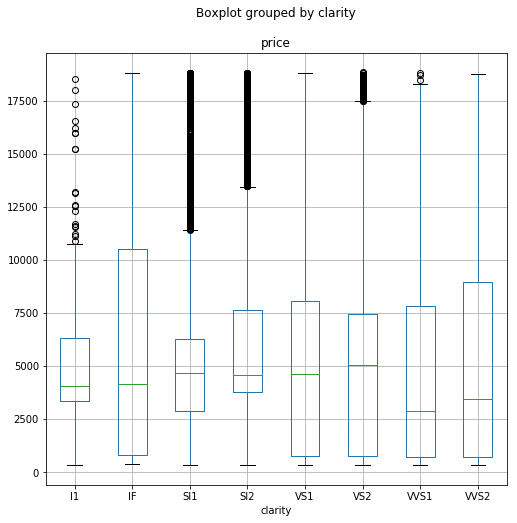

In [177]:
# by를 통해 column의 값을 분류해서 출력
df.boxplot(column='price', by='clarity', figsize=(8,8))

In [183]:
grouped = df.groupby(['cut', 'clarity'])
print(grouped.size())
grouped.head(2)

cut        clarity
Fair       I1          106
           IF            2
           SI1         273
           SI2         353
           VS1          97
           VS2         158
           VVS1         11
           VVS2         37
Good       I1           60
           IF           36
           SI1        1011
           SI2         823
           VS1         402
           VS2         654
           VVS1         93
           VVS2        155
Ideal      I1          125
           IF          324
           SI1        2731
           SI2        1851
           VS1        2005
           VS2        2777
           VVS1        800
           VVS2       1266
Premium    I1          138
           IF           90
           SI1        2471
           SI2        2302
           VS1        1258
           VS2        2194
           VVS1        244
           VVS2        455
Very Good  I1           61
           IF          135
           SI1        2128
           SI2        1591
         

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


In [185]:
clarity_color_table = pd.crosstab(df['clarity'], columns=df['color'])
clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,30,74,88,84,125,57,32
IF,53,51,103,162,120,77,21
SI1,1333,1466,1277,1218,1702,1086,532
SI2,962,1155,1141,1158,1300,790,414
VS1,345,611,776,1349,776,652,397
VS2,743,1191,1362,1603,1148,874,529
VVS1,99,227,296,432,298,141,38
VVS2,250,440,489,760,384,184,100


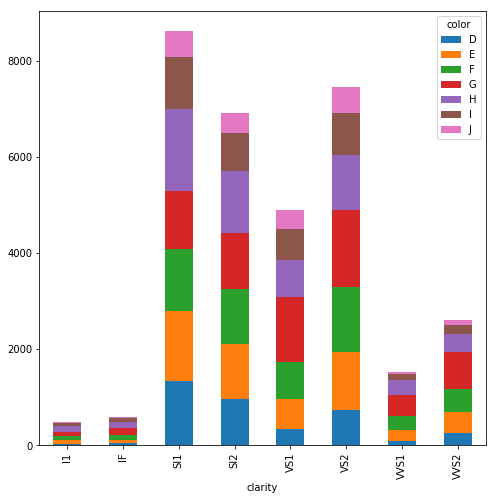

In [186]:
clarity_color_table.plot(kind='bar', figsize=(8,8), stacked=True)

               sum                                               
cut           Fair       Good       Ideal     Premium   Very Good
clarity                                                          
I1        605155.0   284494.0    598487.0    687694.0    301124.0
IF          6066.0   245588.0   1677362.0    726625.0   1013447.0
SI1      1482788.0  4929005.0  13743921.0  14227596.0  10950154.0
SI2      2193116.0  4534846.0  11114295.0  15326488.0   9627421.0
VS1       571336.0  2112036.0  10272048.0   7941970.0   5844036.0


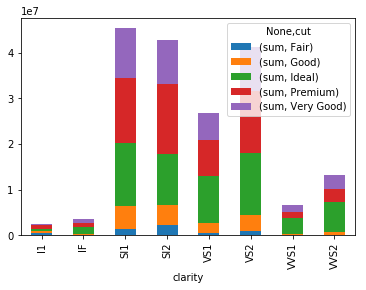

In [191]:
# 행과 열이 범주형이고 데이터가 연속형인 경우 함수를 적용해서 중복되는 데이터를 처리해야 함
my_tab = pd.crosstab(index=df['clarity'], columns=df['cut'],
                     values=df['price'], aggfunc=[np.sum]) # crosstab도 aggfunc 기능 있음
print(my_tab.head())
my_tab.plot.bar(stacked=True)

In [209]:
# 올바르게 데이터 로딩하기
# sales 데이터를 로딩하고 다음을 처리하시오
# 'Customer Number'를 int형으로 처리하시오
# df['Jan Units']를 int형으로 처리하시오
# '2016' 데이터를 float형으로 처리하시오
df = pd.read_csv('sales.csv')
print(sales.dtypes)
print(df.isnull().sum())
print(df.head())
df['Customer Number'] = df['Customer Number'].apply(int)
print(sales.dtypes)

Customer Number     int64
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object
Customer Number    0
Customer Name      0
2016               0
2017               0
Percent Growth     0
Jan Units          0
Month              0
Day                0
Year               0
Active             0
dtype: int64
   Customer Number     Customer Name         2016          2017  \
0          10002.0  Quest Industries  $125,000.00    $162500.00   
1         552278.0    Smith Plumbing  $920,000.00  $101,2000.00   
2          23477.0   ACME Industrial   $50,000.00     $62500.00   
3          24900.0        Brekke LTD  $350,000.00    $490000.00   
4         651029.0         Harbor Co   $15,000.00     $12750.00   

  Percent Growth Jan Units  Month  Day  Year Active  
0         30.00%       500      1   10  2015  

In [269]:
def convert_currency(val):
    new_val = val.replace(',', '').replace('$', '')
    return float(new_val)
def convert_percent(val):
    new_val = val.replace('%', '')
    return float(new_val)/100

df2 = pd.read_csv('sales.csv', dtype={'Customer Number':'int'},
    # converters: Dict of functions for converting values in certain columns. Keys can either be integers or column labels
                  converters={'2016':convert_currency,
                              '2017':convert_currency,
                              'Percent Growth':convert_percent,
                              'Jan Units':lambda x: pd.to_numeric(x, errors='coerce'),
                              'Active':lambda x: np.where(x == 'Y', True, False)})
print(df2.dtypes)
df2.head()

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object


,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False


In [3]:
# 테이블 파싱 : 한 웹페이지에 여러개의 테이블이 존재해도 파싱하여 리턴
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

class HTMLTabpleParser:
    def parse_url(self, url):
        """테이블을 발견하는 메소드"""
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        return [(table('id'), self.parse_html_table(table)) for table in soup.find_all('table')]
    
    # html의 table 내용을 파싱하는 부분
    # table -> tr -> td
    def parse_html_table(self, table):
        n_columns = 0
        n_rows = 0
        column_names = []
        for row in table.find_all('tr'):
            td_tags = row.find_all('td')
            if len(td_tags) > 0:
                n_rows += 1 # 전체 개수를 찾기 위함
                if n_columns == 0: # 초기화가 안됐으면
                    n_columns = len(td_tags) # 열의 개수
            th_tags = row.find_all('th')
            if len(th_tags) > 0 and len(column_names) == 0: # 처음 들어왔을 때
                for th in th_tags: # 열 제목을 뽑아냄
                    column_names.append(th.get_text())
        if len(column_names) > 0 and len(column_names) != n_columns:
            raise Exception("컬럼 타이틀이 컬럼 숫자와 맞지 않는다.")
        columns = column_names if len(column_names) > 0 else range(0, n_columns)
        # 테이블을 파싱한 다음에 DataFrame으로 변환
        df = pd.DataFrame(columns = columns, index = range(0, n_rows))
        row_marker = 0
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')
            for column in columns:
                re_text = column.get_text().replace('\n', '')
                re_text = re_text.replace('\t', '')
                re_text = re_text.replace('\r', '')
                df.iloc[row_marker, column_marker] = re_text
                column_marker += 1
            if len(columns) > 0:
                row_marker += 1
        for col in df:
            try:
                df[col] = df[col].astype(float)
            except ValueError:
                    pass
        return df



In [4]:
date = '2018.07.26'
url_part1 = "http://dart.fss.or.kr/dsac001/search.ax?selectDate="
url_part2 = "&sort=&series=&mdayCnt=0&currentPage="
url = url_part1 + date + url_part2
hp = HTMLTabpleParser()
table = hp.parse_url(url)[0][1]
table

,시간,공시대상회사,보고서명,제출인,접수일자,비고
0,17:52,세원셀론텍,생산중단,세원셀론텍,2018.07.26,
1,17:52,NH투자증권,투자설명서(일괄신고),NH투자증권,2018.07.26,
2,17:50,아티스,주요사항보고서(자기주식처분결정),아티스,2018.07.26,
3,17:50,대성산업,단기차입금증가결정,대성산업,2018.07.26,
4,17:46,디지탈옵틱,[기재정정]주주총회소집결의,디지탈옵틱,2018.07.26,
5,17:45,미래SCI,[기재정정]주주총회소집결의,미래SCI,2018.07.26,
6,17:44,유테크,증권발행결과(자율공시) (제3자배정 유상증자),유테크,2018.07.26,
7,17:44,팜한농,특수관계인에대한출자,팜한농,2018.07.26,
8,17:44,유테크,[기재정정]주요사항보고서(유상증자결정),유테크,2018.07.26,
9,17:44,NH투자증권,[기재정정]일괄신고추가서류(파생결합증권-주가연계증권),NH투자증권,2018.07.26,


In [275]:
# fire_station 데이터를 로딩하고 다음 문제를 해결하시오
# 1) 불평의 종류(중복x)와 불평의 종류별 개수를 출력하시오
# 2) 불평의 상위 10개를 출력하시오
# 3) 불평의 상위 10개를 bar 형태로 출력하시오
# 4) 거주지별 불평의 개수를 확인하시오
# 5) 불평의 종류별로 카운트하시오
# 6) 불평의 종류별로 카운트한 내용을 kde로 출력하시오
# 7) 소음 불평이 많은 지역을 확인하시오
# 8) 거주지별로 불평의 개수를 카운트 하시오
# 9) 소음불평이 전체 불평에서 차지하는 비율을 출력하시오
df = pd.read_csv('fire_station.csv')
df.head()

C:\Users\acorn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [276]:
print(df.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [279]:
print(df['Complaint Type'].unique())
pd.crosstab(df['Complaint Type'], columns='count')

['Noise - Street/Sidewalk' 'Illegal Parking' 'Noise - Commercial'
 'Noise - Vehicle' 'Rodent' 'Blocked Driveway' 'Noise - House of Worship'
 'Street Light Condition' 'Harboring Bees/Wasps' 'Taxi Complaint'
 'Homeless Encampment' 'Traffic Signal Condition' 'Food Establishment'
 'Noise - Park' 'Broken Muni Meter' 'Benefit Card Replacement'
 'Sanitation Condition' 'ELECTRIC' 'PLUMBING' 'HEATING'
 'GENERAL CONSTRUCTION' 'Street Condition' 'Consumer Complaint'
 'Derelict Vehicles' 'Noise' 'Drinking' 'Indoor Air Quality' 'Panhandling'
 'Derelict Vehicle' 'Lead' 'Water System' 'Noise - Helicopter'
 'Homeless Person Assistance' 'Root/Sewer/Sidewalk Condition'
 'Sidewalk Condition' 'Graffiti' 'DOF Literature Request'
 'Animal in a Park' 'Overgrown Tree/Branches' 'Air Quality'
 'Dirty Conditions' 'Water Quality' 'Other Enforcement'
 'Collection Truck Noise' 'Illegal Tree Damage' 'Litter Basket / Request'
 'Violation of Park Rules' 'Maintenance or Facility' 'Sewer'
 'Agency Issues' 'Beach/Pool/Sa

col_0,count
Complaint Type,
APPLIANCE,445
Adopt-A-Basket,3
Agency Issues,174
Air Quality,459
Animal Abuse,164
Animal Facility - No Permit,8
Animal in a Park,84
Asbestos,143
BEST/Site Safety,52


In [286]:
top10 = pd.crosstab(df['Complaint Type'], columns='count').sort_values(by='count', ascending=False)[:11]
top10

col_0,count
Complaint Type,
HEATING,14200
GENERAL CONSTRUCTION,7471
Street Light Condition,7117
DOF Literature Request,5797
PLUMBING,5373
PAINT - PLASTER,5149
Blocked Driveway,4590
NONCONST,3998
Street Condition,3473


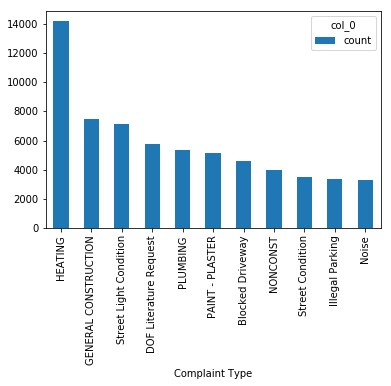

In [287]:
top10.plot.bar()

In [345]:
print(len(df['Location Type'].unique()))
print(len(df['Complaint Type'].unique()))
pd.crosstab(df['Location Type'], columns='Complaints').head()


91
165


col_0,Complaints
Location Type,
1-2 Family Dwelling,572
1-2 Family Mixed Use Building,52
1-3 Family Dwelling,2
1-3 Family Mixed Use Building,1
3+ Family Apartment Building,299


col_0,count
Complaint Type,
APPLIANCE,445
Adopt-A-Basket,3
Agency Issues,174
Air Quality,459
Animal Abuse,164


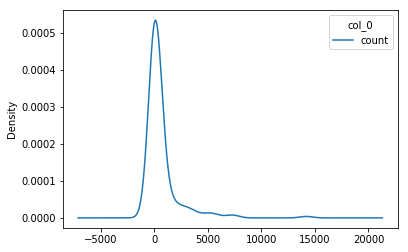

In [301]:
pd.crosstab(df['Complaint Type'], columns='count').plot(kind='kde')
pd.crosstab(df['Complaint Type'], columns='count').head()

In [365]:
# print(df['Complaint Type'].unique())
noise = df[df['Complaint Type'].str.contains('Noise')]
noise_table = pd.crosstab(noise['Location Type'], columns='counts')
print(noise_table)
noise_table.sort_values(by='counts', ascending=False)

col_0                counts
Location Type              
Above Address            99
Club/Bar/Restaurant    1828
House of Worship         67
Park/Playground         191
Sidewalk                  8
Store/Commercial        750
Street/Sidewalk        2678


col_0,counts
Location Type,
Street/Sidewalk,2678
Club/Bar/Restaurant,1828
Store/Commercial,750
Park/Playground,191
Above Address,99
House of Worship,67
Sidewalk,8


In [360]:
print('전체 :', len(df))
print('소음 :', len(noise))
print('비율 : ', round(100 * len(noise) / len(df), 2), '%', sep='')

전체 : 111069
소음 : 8942
비율 : 8.05%
